In [1]:
from lib.Locate_ppl import Locate_ppl
from lib.Recognizer import Recognizer
from lib.PersonEmbeding import PersonEmbeding
from lib.EmbedingsManiger import EmbedingsManiger
from matplotlib import pyplot as plt
import torch
lp = Locate_ppl(save_img=True)
rec = Recognizer("test")
emb_maniger = EmbedingsManiger(cache_ram=True)
pe = PersonEmbeding()

Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\artur/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
Using cache found in C:\Users\artur/.cache\torch\hub\pytorch_vision_v0.5.0
models/test.ckpt not found ...
Starting with random weights


In [2]:
print(emb_maniger.info)

{'Arturas', 'Samuel', 'Giedre', 'Gabby', 'Others', 'Kiri'}


In [51]:
#emb_maniger.remove('ArturasRedHoody')

True

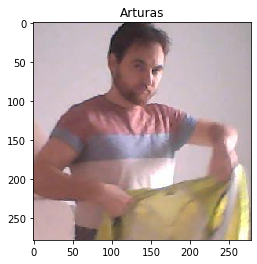

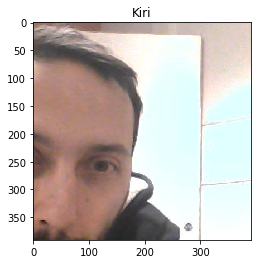

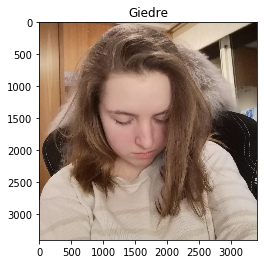

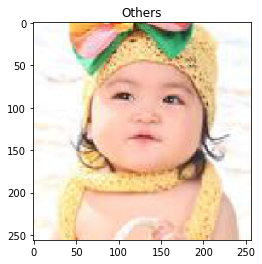

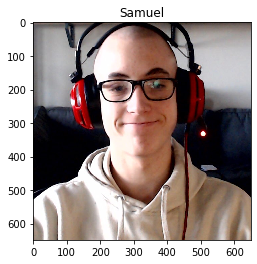

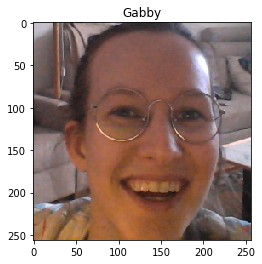

In [3]:
emb_maniger.show_all()


In [29]:
#emb_maniger.remove("Arturas")
lp.path="giedre"

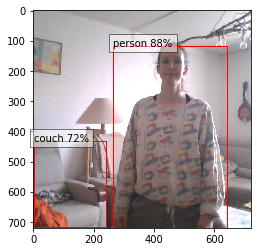

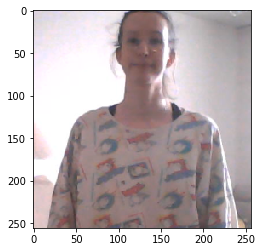

In [9]:
lp.set_path("images")
ppl = lp.snap()

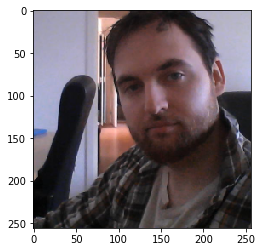

In [14]:
plt.imshow(ppl[0])
plt.show()

In [6]:
p = next(iter(ppl))
print(p.shape)
emb = pe.embed(ppl)
print(emb.shape)
r = rec(emb)
print(r)

(256, 256, 3)
torch.Size([1, 512])
tensor([[0.4489, 0.5511]])


In [10]:
a = []

In [11]:
def get_data(data, it=3):
    c = 0
    for img in lp:
        if len(img)==0:
            continue
        print(c)
        for i in img:
            plt.imshow(i)
            plt.show()
        emb = pe.gen_training_emb(img)
        for e in emb:
            data.append(e)
        c+=1
        if c >= it:
            break

0


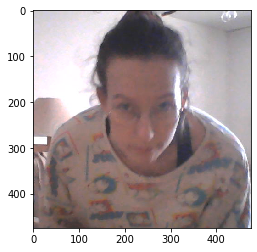

1


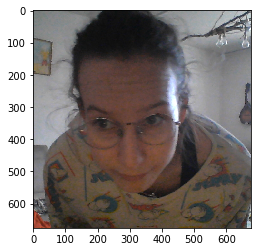

2


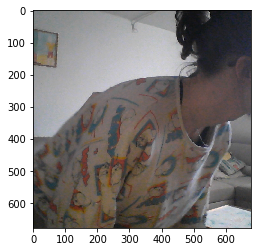

3


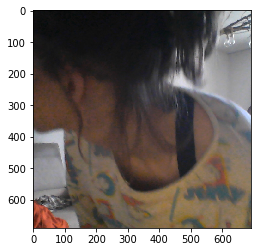

4


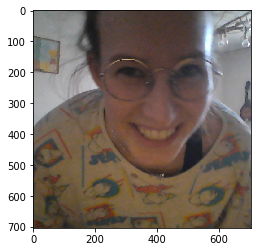

5


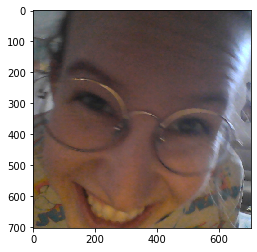

6


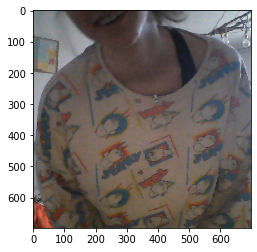

7


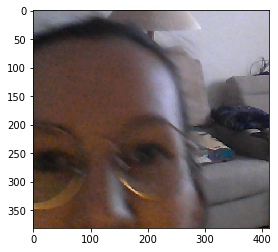

8


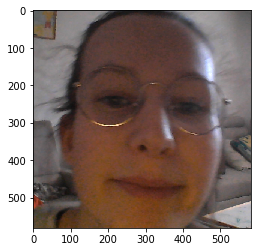

9


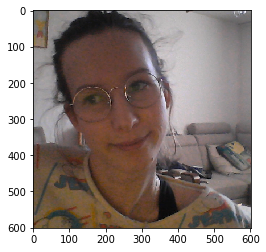

120

In [14]:
lp.set_path("gabby")
lp.from_disk = False
pe.nb_emb=4
get_data(a, 10)
len(a)

In [8]:
len(a)

208

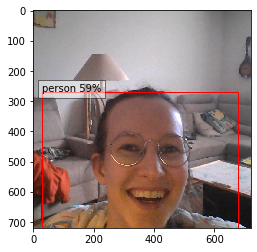

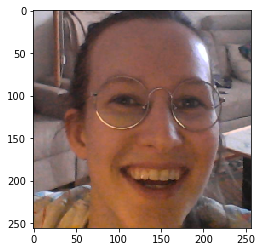

In [19]:
ppl = lp.snap()

In [20]:
#emb_maniger.new("Gabby", ppl[0], a)
#emb_maniger.add("Others", b)
#emb_maniger.add("Arturas", a)

True

In [13]:
for n in emb_maniger.info:
    print(n, emb_maniger.get_len(n))
    

Arturas 276
Kiri 116
Giedre 100
Others 1358
Samuel 148
Gabby 120


In [3]:
models = [Recognizer(n, load=False) for n in emb_maniger.info]

In [6]:
for person in models:
    print(person.name)
    person.get_beter(emb_maniger, 1000)

Arturas
curret loss:0.0018853565120230337 after 1008 images
Samuel
curret loss:0.0014997973056459749 after 1008 images
Giedre
curret loss:0.0015256745275110007 after 1008 images
Gabby
curret loss:0.0016315974694277558 after 1008 images
Others
curret loss:0.0016762562581668545 after 1008 images
Kiri
curret loss:0.0017003209330141544 after 1008 images


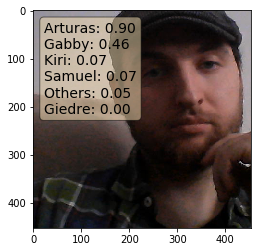

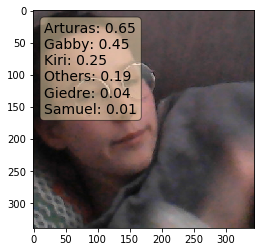

In [7]:
from collections import defaultdict
lp.path="images"
#lp.path="images/test"
lp.from_disk=False
for img in lp:
    if len(img) == 0:
        continue
    
    emb = pe.embed(img)
    pred = defaultdict(list)
    for reco in models:
        r = reco(emb)
        for p in r:
            pred[reco.name].append(p[1].item())
    for idx, im in enumerate(img):
        fig, ax = plt.subplots()
        ax.imshow(im)
        textstr = '\n'.join([f"{p}: {v[idx]:.2f}" 
                        for p, v in sorted(pred.items(), reverse=True, key=lambda x: x[1][idx])])
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                    verticalalignment='top', bbox=props)
    plt.show()

    msg = input("press enter for next:")
    if len(msg) > 1:
        break

In [10]:
for m in models:
    m.save()

Model saved at: models/Kiri.ckpt
Model saved at: models/Arturas.ckpt
Model saved at: models/Others.ckpt
Model saved at: models/Samuel.ckpt
Model saved at: models/Giedre.ckpt
